In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [27]:
#cleaning data, drop some columns that will not use
df.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'keywords', 'popularity','release_date', 'vote_average', 'vote_count', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [28]:
#the columns I need in my project
df.head()

,budget,revenue,runtime,genres
0,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller
1,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller
2,110000000,295238201,119,Adventure|Science Fiction|Thriller
3,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy
4,190000000,1506249360,137,Action|Crime|Thriller


# Questions

#### 1- What are the average budgets?
#### 2- What are the average revenues?

#### 3- What is the highest budget that has been spent?
#### 4- What is the highest revenue that has been earned?

#### 5- What is the total budgets spent?
#### 6- What is the total revenue earned?

#### 7- What is the most genres of movies?


# Cleaning data rows and handle missing values, and fix the data types

In [29]:
# change the revenue and budget to float

df['revenue'] = df['revenue'].astype(float)
df['budget'] = df['budget'].astype(float)

In [30]:
#I replaced 0 values in budget and revenue with null

df['budget']=df['budget'].replace(0, np.nan)

df['revenue']=df['revenue'].replace(0, np.nan)

In [31]:
df.describe()

,budget,revenue,runtime
count,5.170000e+03,4.850000e+03,10866.000000
mean,3.073943e+07,8.922066e+07,102.070863
std,3.890065e+07,1.620684e+08,31.381405
min,1.000000e+00,2.000000e+00,0.000000
25%,6.000000e+06,7.708081e+06,90.000000
50%,1.700000e+07,3.182654e+07,99.000000
75%,4.000000e+07,9.991823e+07,111.000000
max,4.250000e+08,2.781506e+09,900.000000




### here is a brief of cleaning steps that I did:

* Firstly I dropped that colmns that will not tuse in analyas, I did that to make concentration on the data I need.
* I changed the data type to float to make it easy for work on it.
* I found many zero values in budget and revenue, I fixed it by fill it with null.

# Let's Discovering cleaned data 👇


In [32]:
#function to calculate mean of numeric data

def mean_calculation(mean):
    return mean.mean()

In [33]:
#function to show plots to not repeate code
def showplots(df,xvalues, stat, color='blue'):
    df[xvalues].agg(stat).plot.bar(color = color,
                                  width=0.9,
                                  rot=0,
                                  figsize=[12.70,7.27])
    plt.yticks(color='blue')
    plt.xlabel(f'{" and ".join(xvalues)}'.title())
    plt.ylabel(f'{stat} values(10M)'.title())
    plt.title(f"{stat} of budgets and revenue".title())
    

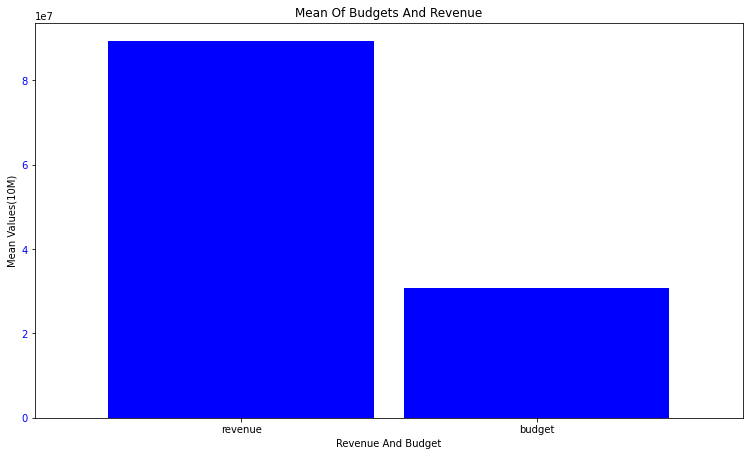

In [34]:
showplots(df,['revenue','budget'], stat='mean', color='blue')

### the function `showplots`above is not work perfectly, i tried to fix it but did not find the solution yet, so i made plots code separately for each type: mean, total, max...  👇






.

In [35]:
#mean of budget of all movies

mean_budget = mean_calculation(df['budget'])


print(mean_budget)

30739432.899226304


In [36]:
#mean of revenue of all movies

mean_revenue = mean_calculation(df['revenue'])


print(mean_revenue)

89220658.32474227


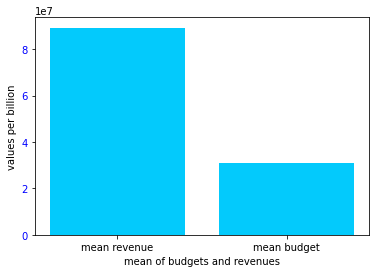

In [37]:

x = np.array(["mean revenue", "mean budget"])
y = mean_revenue, mean_budget


plt.bar(x, y, color = "#03cafc")

plt.yticks(color='blue')
plt.xlabel('mean of budgets and revenues')
plt.ylabel('values per billion')


plt.show()

In [38]:
#max budget has been spent
max_budget = df['budget'].max()

print(max_budget)


425000000.0


In [39]:
#max revenue has been spent
max_revenue = df['revenue'].max()
print(max_revenue)


2781505847.0


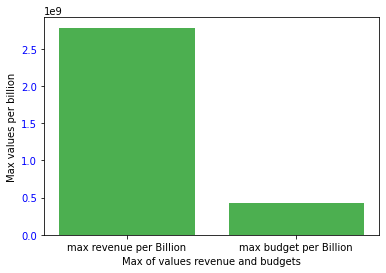

In [40]:
#max values of budgets and revenues
x = np.array(["max revenue per Billion", "max budget per Billion"])
y = max_revenue, max_budget


plt.bar(x, y, color = "#4CAF50")

plt.yticks(color='blue')
plt.xlabel('Max of values revenue and budgets')
plt.ylabel('Max values per billion')

plt.show()

In [41]:
#total of budget that has been spent to make movies
total_budgets = df['budget'].sum() 

print(total_budgets)

158922868089.0


In [42]:
#total of revenue that has been profit from selling movies

total_revenue = df['revenue'].sum() 


print(total_revenue)

432720192875.0


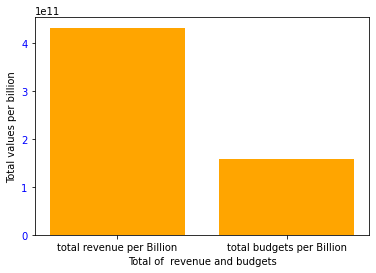

In [43]:
#total values of budgets and revenues
x = np.array(["total revenue per Billion", "total budgets per Billion"])
y = total_revenue, total_budgets


plt.bar(x, y, color = "orange")

plt.yticks(color='blue')
plt.xlabel('Total of  revenue and budgets')
plt.ylabel('Total values per billion')

plt.show()

[Text(0.5, 0, 'minutes'), Text(0, 0.5, 'number of movies')]

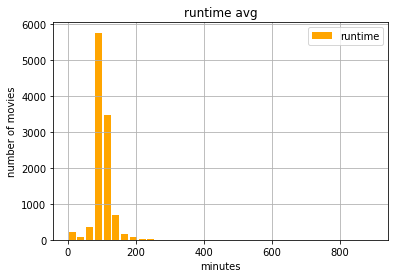

In [44]:
plot_runtime = df['runtime'].plot(kind='hist',
                                 grid=True,
                                 legend=True,
                                 title='runtime avg',
                                 rwidth=0.8,
                                 bins=35,
                                 color='orange')
plot_runtime.set(xlabel='minutes', ylabel='number of movies')

#### we can see the average runtime is almost under 200 minutes, which is reach mor than 5000 movie, and the `avg runtime` is `102` minute

In [45]:
df['runtime'].mean()

102.07086324314375

In [46]:
#Total of movies that contains selected genres

all_action = len(df[df['genres'].str.contains('Action') == True])

all_comedy = len(df[df['genres'].str.contains('Comedy') == True])

all_drama = len(df[df['genres'].str.contains('Drama') == True])

all_horror = len(df[df['genres'].str.contains('Horror') == True])


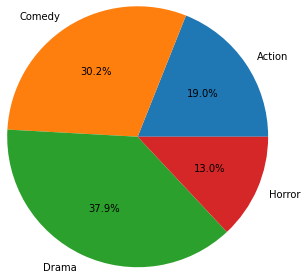

In [47]:
labels = 'Action', 'Comedy', 'Drama', 'Horror' 
values = [all_action, all_comedy, all_drama, all_horror]

plt.pie(values, labels=labels, radius=1.5, autopct='%1.1f%%')
       
plt.show()

# Conclusion
* we can see that movies is very profitable, the revenue total is `$432,720,192,875` while total of investment is to low comparsing with proft, which is `$158,922,868,089`.
* avarage of movies budgets is `$30,739,432.9`.
* avarage of movies revenue is `$89,220,658.32`.
* avarage of movies length is `102`minutes.
* we can see the most of movies genres is in `Drama` which is `37.9%` from all movies, the second genre is the `Comedy`, which is `30.2%`. the third genre is the `Action` which is `19%`, and the `Horror` movies is `13%`

## Limitation

* We have used TMBD Movies dataset for our analysis and worked with `budget`, `revenue`. `genres` and `runtime`. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed or votes or rating.

* We dropped many missing values of `budget` and `revenue`, so  might skew our analysis and could show unintentional bias towards the relationship being analyzed.